In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [2]:
# Read in data
df = pd.read_csv('/Users/balwiiredavis/Desktop/AmazonFineFoods3k.csv')

In [3]:
df.columns = ["Id", "Product Id", "User Id", "Profile Name", "Helpful Numerator", "Helpful Denominator", "Score", "Date", "Summary", "Text"]


In [4]:
df.head()

,Id,Product Id,User Id,Profile Name,Helpful Numerator,Helpful Denominator,Score,Date,Summary,Text
0,565456,B002GKEK7G,A1RJXXXKCCBRW1,curlymeg,0,0,4,1316304000,great drink,This is a nice drink when I have my chocolate ...
1,565457,B002GKEK7G,A18HMM4NUF4CJA,Kathy Little,0,0,5,1315612800,"Best tasting, hands down.",I have been drinking Click for almost two year...
2,565458,B002GKEK7G,A3TM73X9E4X44C,Lovingliving 990,0,0,5,1314835200,AWESOME PRODUCT,This is such a wonderful product. There is no...
3,565459,B002GKEK7G,A1N0A7NKLEZHIK,Chris S.,0,0,5,1314144000,Click starts my day!,Click is my protein drink every single morning...
4,565460,B002GKEK7G,A2AQL11U5EGHQE,violet412,0,0,5,1312329600,Addicted to this stuff. It is awesome.,This is my coffee and protein with great flavo...


In [5]:
df.shape

(2999, 10)

In [6]:
df = df.head(500)

In [7]:
df.shape

(500, 10)

In [8]:
# Quick EDA

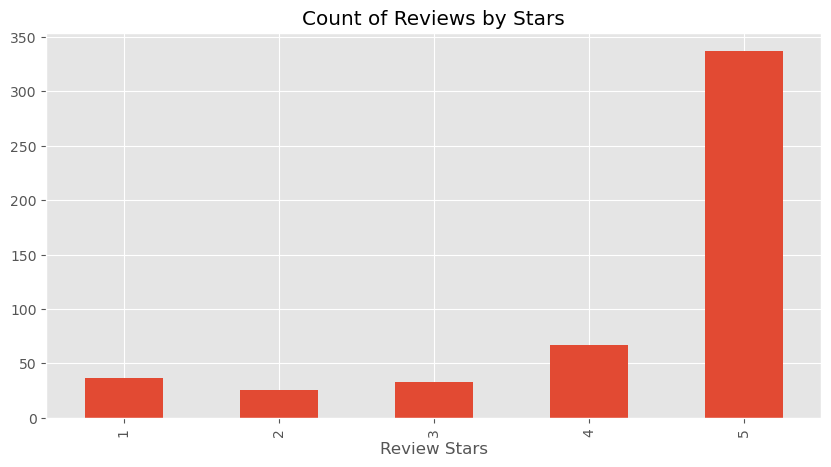

In [9]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [10]:
# Basic NLTK

In [11]:
example = df['Text'][50]
print(example)

I love this product, The best tasting protein drink I have tried.  It mixes up real nice, no clumps!


In [12]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['I',
 'love',
 'this',
 'product',
 ',',
 'The',
 'best',
 'tasting',
 'protein',
 'drink']

In [13]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('I', 'PRP'),
 ('love', 'VBP'),
 ('this', 'DT'),
 ('product', 'NN'),
 (',', ','),
 ('The', 'DT'),
 ('best', 'JJS'),
 ('tasting', 'NN'),
 ('protein', 'NN'),
 ('drink', 'VBP')]

In [14]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  I/PRP
  love/VBP
  this/DT
  product/NN
  ,/,
  The/DT
  best/JJS
  tasting/NN
  protein/NN
  drink/VBP
  I/PRP
  have/VBP
  tried/VBN
  ./.
  It/PRP
  mixes/VBD
  up/RP
  real/JJ
  nice/NNS
  ,/,
  no/DT
  clumps/NN
  !/.)


In [15]:
# VADER Seniment Scoring

In [16]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [17]:
sia.polarity_scores(example)

{'neg': 0.082, 'neu': 0.487, 'pos': 0.431, 'compound': 0.8832}

In [18]:
# entire data set - 1000

In [19]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [20]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')


In [21]:
# Now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,Product Id,User Id,Profile Name,Helpful Numerator,Helpful Denominator,Score,Date,Summary,Text
0,565456,0.000,0.714,0.286,0.8313,B002GKEK7G,A1RJXXXKCCBRW1,curlymeg,0,0,4,1316304000,great drink,This is a nice drink when I have my chocolate ...
1,565457,0.000,0.923,0.077,0.6369,B002GKEK7G,A18HMM4NUF4CJA,Kathy Little,0,0,5,1315612800,"Best tasting, hands down.",I have been drinking Click for almost two year...
2,565458,0.046,0.828,0.126,0.5994,B002GKEK7G,A3TM73X9E4X44C,Lovingliving 990,0,0,5,1314835200,AWESOME PRODUCT,This is such a wonderful product. There is no...
3,565459,0.000,0.892,0.108,0.6696,B002GKEK7G,A1N0A7NKLEZHIK,Chris S.,0,0,5,1314144000,Click starts my day!,Click is my protein drink every single morning...
4,565460,0.055,0.724,0.221,0.7003,B002GKEK7G,A2AQL11U5EGHQE,violet412,0,0,5,1312329600,Addicted to this stuff. It is awesome.,This is my coffee and protein with great flavo...


In [22]:
# Plot VADER results

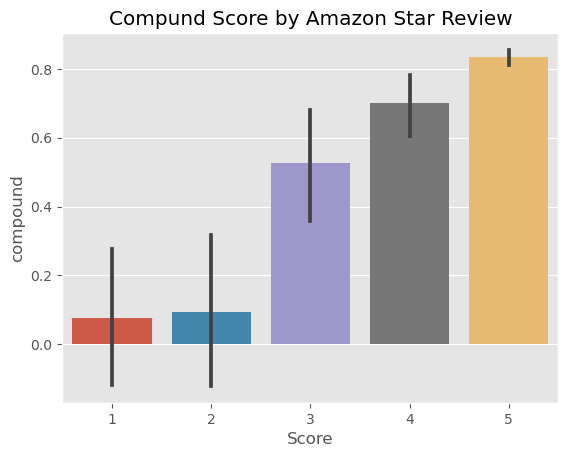

In [23]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

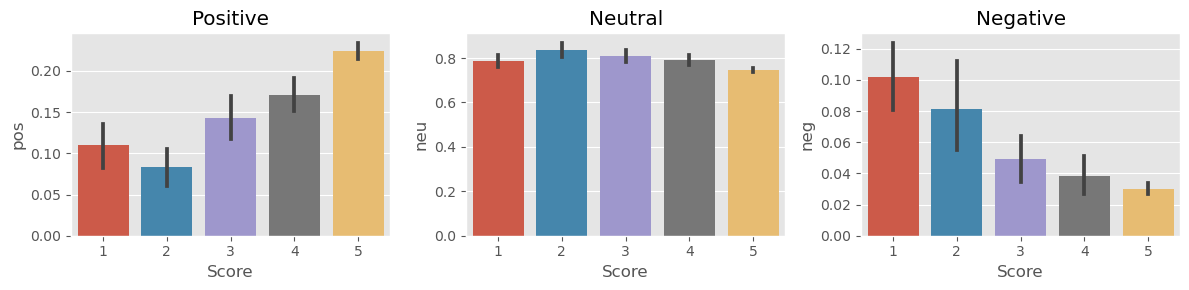

In [24]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [25]:
# Roberta Pretrained Model

In [26]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [27]:
# download the model
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [28]:
# VADER results test on the example
print(example)
sia.polarity_scores(example)

I love this product, The best tasting protein drink I have tried.  It mixes up real nice, no clumps!


{'neg': 0.082, 'neu': 0.487, 'pos': 0.431, 'compound': 0.8832}

In [29]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.0015292683, 'roberta_neu': 0.0076724845, 'roberta_pos': 0.99079823}


In [30]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [31]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 565852
Broke for id 565872
Broke for id 565892


In [32]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [33]:
# Compare Scores between models

In [34]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'Product Id', 'User Id',
       'Profile Name', 'Helpful Numerator', 'Helpful Denominator', 'Score',
       'Date', 'Summary', 'Text'],
      dtype='object')

In [35]:
# Combine and compare

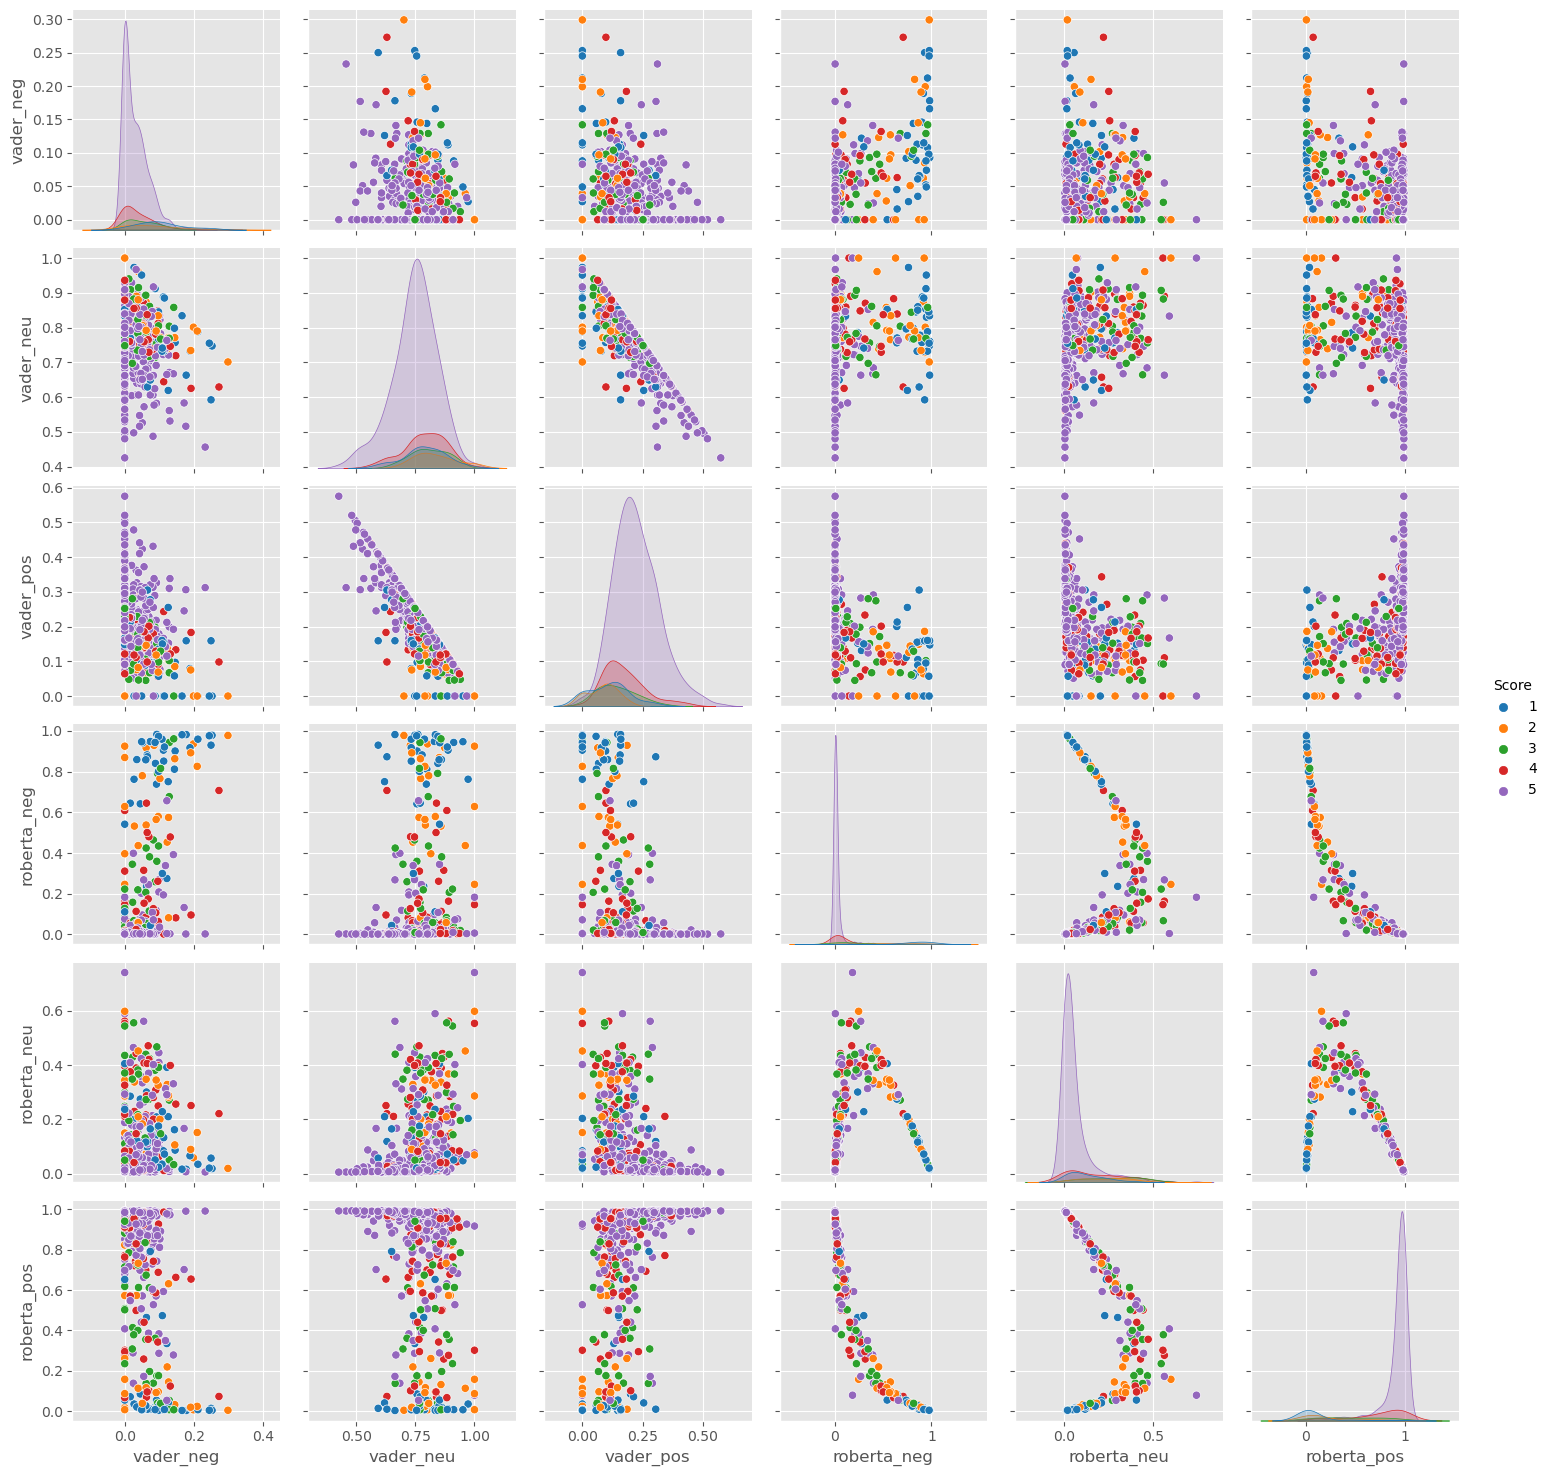

In [36]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()


In [37]:
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

'this is a great product, but these bottles retail for about $2 each at your local whole foods/new seasons store!'

In [38]:
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

'Please consider whether you want to buy and consume something that was created in an inhumane way. There is no humane way to create a product like this.'

In [39]:
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]


'My pup can chew up any rawhide chew pretty quick.  After gnawing on this for an hour it was still just mostly scrached up.  However, after that she lost interest in it and never did finish it. Not sure if it lost its flavor or what.'

In [40]:
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]


'i totally love this protein shake there is no weird taste no after taste NO shakes and it actually keeps me full and gives me great energy!!! i def recommend to everyone!!!!'